# Step 1: Setup

Import libraries and dataset

In [ ]:
# Imports
import sklearn
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from scipy.stats import randint

In [ ]:
dataset = pd.read_csv('aadt_000_arlington_2023.csv')

In [ ]:
# Memory usage in MB
dataset_size_MB = dataset.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Dataset size: {dataset_size_MB:.2f} MB\n")

# Number of rows and columns
num_entries = dataset.shape[0]
print(f"Number of entries: {num_entries}")
num_features = dataset.shape[1]
print(f"Number of features: {num_features}\n")

# Categorical data
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {list(categorical_columns)}")
print(f"Number of categorical features: {len(categorical_columns)}\n")

# Missing values
missing_values = dataset.isnull().sum()
print(f"Missing values in each column:\n{missing_values[missing_values > 0]}\n")

# Basic statistics
print("Basic statistics:")
print(dataset.describe())  # Numeric columns

Dataset size: 0.98 MB

Number of entries: 864
Number of features: 27

Categorical columns: ['RNS Route Name', 'Route Label', 'Route Alias', 'City Name', 'Maintenance Jurisdiction', 'County Name', 'Start Label', 'End Label', 'AADT Quality', 'Percent 2 and 4 Tire Vehicles', 'Percent buses', 'Percent Single Unit Trucks 2 Axle', 'Percent Single Unit Trucks 3+ Axle', 'Percent Combination Trucks 1 Trailer', 'Percent Combination Trucks 2+ Trailer', 'Vehicle Classification Quality', 'K Factor Quality', 'AAWDT Quality', 'Comment']
Number of categorical features: 19

Missing values in each column:
Route Alias                               89
End Label                                  1
Link Length                               19
AADT                                     121
Percent 2 and 4 Tire Vehicles            298
Percent buses                            298
Percent Single Unit Trucks 2 Axle        298
Percent Single Unit Trucks 3+ Axle       298
Percent Combination Trucks 1 Trailer     298


# Step 2: Clean Up

In [ ]:
dataset = dataset.drop(['Route Alias', 'Comment'], axis=1)
percent_columns = ['Percent 2 and 4 Tire Vehicles', 'Percent buses', 'Percent Single Unit Trucks 2 Axle', 'Percent Single Unit Trucks 3+ Axle', 'Percent Combination Trucks 1 Trailer', 'Percent Combination Trucks 2+ Trailer']
for col in percent_columns:
    dataset[col] = dataset[col].str.replace('%', '').astype(float)


# Number of rows and columns
num_entries = dataset.shape[0]
print(f"Number of entries: {num_entries}")
num_features = dataset.shape[1]
print(f"Number of features: {num_features}\n")

# Categorical data?
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {list(categorical_columns)}")
print(f"Number of categorical features: {len(categorical_columns)}\n")

# Missing values
missing_values = dataset.isnull().sum()
print(f"Missing values in each column:\n{missing_values[missing_values > 0]}\n")

# Basic statistics
print("Basic statistics:")
print(dataset.describe())  # Numeric columns

print(dataset.describe())

Number of entries: 864
Number of features: 25

Categorical columns: ['RNS Route Name', 'Route Label', 'City Name', 'Maintenance Jurisdiction', 'County Name', 'Start Label', 'End Label', 'AADT Quality', 'Vehicle Classification Quality', 'K Factor Quality', 'AAWDT Quality']
Number of categorical features: 11

Missing values in each column:
End Label                                  1
Link Length                               19
AADT                                     121
Percent 2 and 4 Tire Vehicles            298
Percent buses                            298
Percent Single Unit Trucks 2 Axle        298
Percent Single Unit Trucks 3+ Axle       298
Percent Combination Trucks 1 Trailer     298
Percent Combination Trucks 2+ Trailer    298
K Factor                                 129
K Factor Quality                         129
Direction Factor                         129
AAWDT                                    126
AAWDT Quality                            126
Data Date                     

# Step 3: Data discovery and visualization

In [ ]:
ordinal_encoder = OrdinalEncoder()
rns_route_name_encoded = ordinal_encoder.fit_transform(dataset[["RNS Route Name"]])
route_label_encoded = ordinal_encoder.fit_transform(dataset[["Route Label"]])
city_name_encoded = ordinal_encoder.fit_transform(dataset[["City Name"]])
maintenance_jurisdiction_encoded = ordinal_encoder.fit_transform(dataset[["Maintenance Jurisdiction"]])
county_name_encoded = ordinal_encoder.fit_transform(dataset[["County Name"]])
start_label_encoded = ordinal_encoder.fit_transform(dataset[["Start Label"]])
end_label_encoded = ordinal_encoder.fit_transform(dataset[["End Label"]])
aadt_quality_encoded = ordinal_encoder.fit_transform(dataset[["AADT Quality"]])
vehicle_classification_quality_encoded = ordinal_encoder.fit_transform(dataset[["Vehicle Classification Quality"]])
k_factor_quality_encoded = ordinal_encoder.fit_transform(dataset[["K Factor Quality"]])
aawdt_quality_encoded = ordinal_encoder.fit_transform(dataset[["AAWDT Quality"]])

dataset_visualization = dataset.copy()
dataset_visualization["rns_route_name_encoded"] = rns_route_name_encoded
dataset_visualization["route_label_encoded"] = route_label_encoded
dataset_visualization["city_name_encoded"] = city_name_encoded
dataset_visualization["maintenance_jurisdiction_encoded"] = maintenance_jurisdiction_encoded
dataset_visualization["county_name_encoded"] = county_name_encoded
dataset_visualization["start_label_encoded"] = start_label_encoded
dataset_visualization["end_label_encoded"] = end_label_encoded
dataset_visualization["aadt_quality_encoded"] = aadt_quality_encoded
dataset_visualization["vehicle_classification_quality_encoded"] = vehicle_classification_quality_encoded
dataset_visualization["k_factor_quality_encoded"] = k_factor_quality_encoded
dataset_visualization["aawdt_quality_encoded"] = aawdt_quality_encoded

In [ ]:
corr_matrix = dataset_visualization.corr(numeric_only=True)
corr_matrix.shape
corr_matrix["AADT"].sort_values(ascending=False)

,AADT
AADT,1.000000
AAWDT,0.976859
Percent Combination Trucks 1 Trailer,0.266017
Link Length,0.260165
route_label_encoded,0.250714
county_name_encoded,0.198712
maintenance_jurisdiction_encoded,0.198712
Direction Factor,0.151461
Percent 2 and 4 Tire Vehicles,0.148260
Percent Single Unit Trucks 3+ Axle,0.108765


array([[<Axes: xlabel='AADT', ylabel='AADT'>,
        <Axes: xlabel='AAWDT', ylabel='AADT'>,
        <Axes: xlabel='Percent Combination Trucks 1 Trailer', ylabel='AADT'>,
        <Axes: xlabel='K Factor', ylabel='AADT'>],
       [<Axes: xlabel='AADT', ylabel='AAWDT'>,
        <Axes: xlabel='AAWDT', ylabel='AAWDT'>,
        <Axes: xlabel='Percent Combination Trucks 1 Trailer', ylabel='AAWDT'>,
        <Axes: xlabel='K Factor', ylabel='AAWDT'>],
       [<Axes: xlabel='AADT', ylabel='Percent Combination Trucks 1 Trailer'>,
        <Axes: xlabel='AAWDT', ylabel='Percent Combination Trucks 1 Trailer'>,
        <Axes: xlabel='Percent Combination Trucks 1 Trailer', ylabel='Percent Combination Trucks 1 Trailer'>,
        <Axes: xlabel='K Factor', ylabel='Percent Combination Trucks 1 Trailer'>],
       [<Axes: xlabel='AADT', ylabel='K Factor'>,
        <Axes: xlabel='AAWDT', ylabel='K Factor'>,
        <Axes: xlabel='Percent Combination Trucks 1 Trailer', ylabel='K Factor'>,
        <Axes: xlab

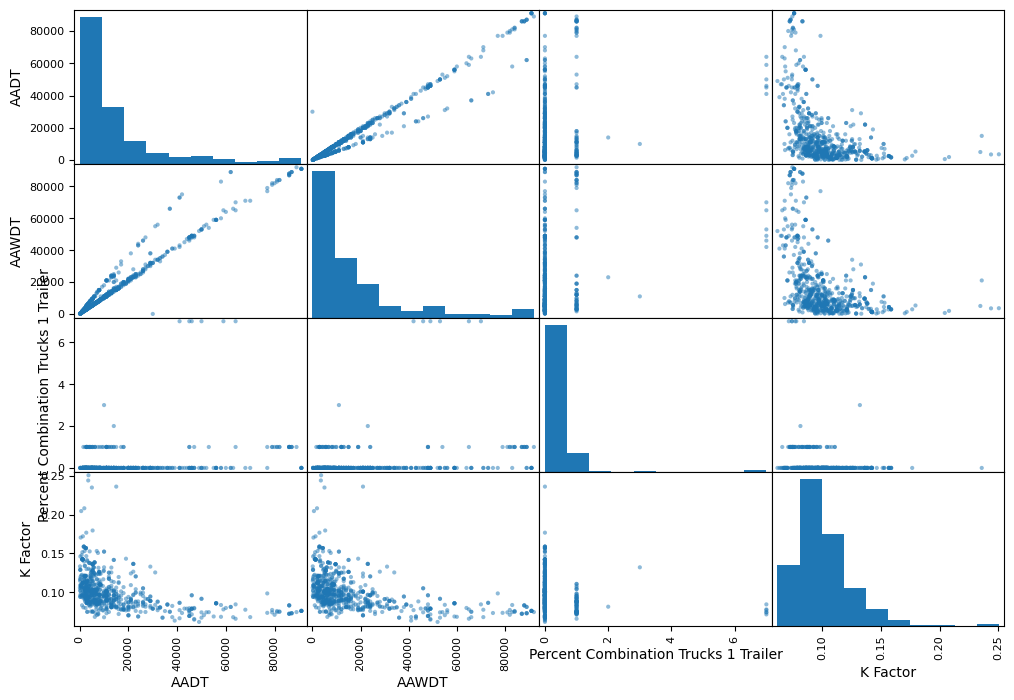

In [ ]:
attributes = ["AADT", "AAWDT", "Percent Combination Trucks 1 Trailer", "K Factor"]
scatter_matrix(dataset_visualization[attributes], figsize=(12, 8))

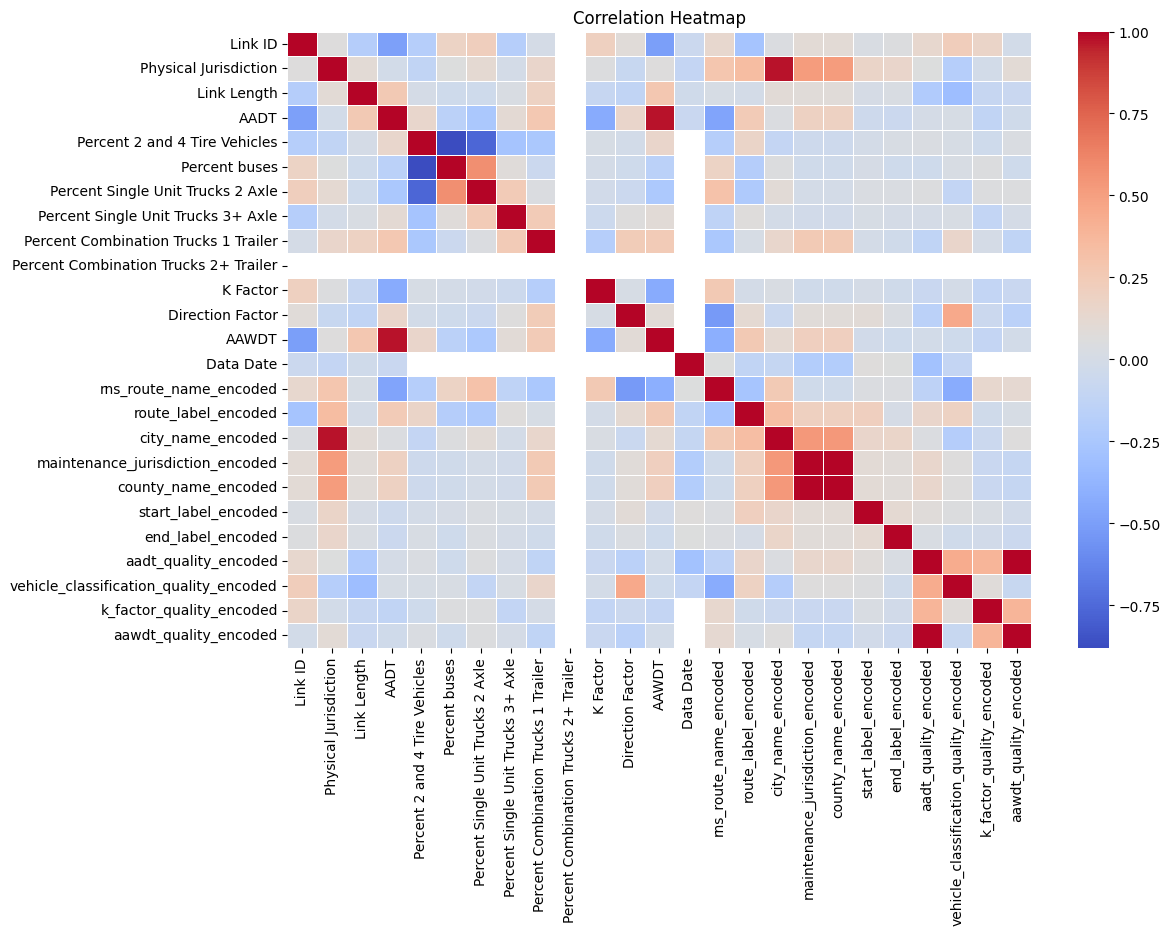

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(dataset.shape)
dataset = dataset.dropna(subset=["AADT"])
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
print(dataset.shape)
# AADT_copy_train = train_set["AADT"].copy()
# AADT_copy_train.fillna(AADT_copy_train.median(), inplace=True)
# AADT_copy_test = test_set["AADT"].copy()
# AADT_copy_test.fillna(AADT_copy_test.median(), inplace=True)


train_set_x = train_set.drop("AADT", axis=1) # drop labels for training set
train_set_y = train_set["AADT"].copy().to_numpy()

test_set_x = test_set.drop("AADT", axis=1) # drop labels for test set
test_set_y = test_set["AADT"].copy().to_numpy()


dataset_numerical = train_set.copy()

categorical_columns = [
    'RNS Route Name', 'Route Label', 'City Name',
    'Maintenance Jurisdiction', 'County Name', 'Start Label',
    'End Label', 'AADT Quality', 'Vehicle Classification Quality',
    'K Factor Quality', 'AAWDT Quality'
]


dataset_numerical.drop(columns=categorical_columns, inplace=True)
dataset_numerical.drop(columns=["AADT"], inplace=True)
dataset_numerical.fillna(dataset_numerical.median(), inplace=True)

num_attribs = dataset_numerical.select_dtypes(include=['number']).columns.tolist()
cat_attribs = categorical_columns

(864, 25)
(743, 25)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

In [ ]:
train_set_prepared = full_pipeline.fit_transform(train_set_x)
test_set_prepared = full_pipeline.transform(test_set_x)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_set_prepared, train_set_y)
aadt_predictions = lin_reg.predict(train_set_prepared)

lin_mse = mean_squared_error(train_set_y, aadt_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(train_set_y, aadt_predictions)
print(f"RMSE: {lin_rmse}\nMAE: {lin_mae}")

aadt_predictions_test = lin_reg.predict(test_set_prepared)

lin_mse_test = mean_squared_error(test_set_y, aadt_predictions_test)
lin_rmse_test = np.sqrt(lin_mse_test)

lin_mae_test = mean_absolute_error(test_set_y, aadt_predictions_test)
print(f"Test RMSE: {lin_rmse_test}\nTest MAE: {lin_mae_test}")

RMSE: 37.82843880682643
MAE: 5.390674964952537
Test RMSE: 4790.70392590932
Test MAE: 2102.611411002607


In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(train_set_prepared, train_set_y)
rf_predictions = rf_model.predict(train_set_prepared)

rf_mse = mean_squared_error(train_set_y, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(train_set_y, rf_predictions)

print(f"Random Forest RMSE: {rf_rmse}\nRandom Forest MAE: {rf_mae}")

rf_predictions_test = rf_model.predict(test_set_prepared)

rf_mse_test = mean_squared_error(test_set_y, rf_predictions_test)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_test = mean_absolute_error(test_set_y, rf_predictions_test)

print(f"Random Forest RMSE: {rf_rmse_test}\nRandom Forest MAE: {rf_mae_test}")

Random Forest RMSE: 1180.8498360785195
Random Forest MAE: 395.62010101010094
Random Forest RMSE: 3731.647722451821
Random Forest MAE: 1468.0235570469797


In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=10000, epsilon=0.1)
svr_model.fit(train_set_prepared, train_set_y)
svr_predictions = svr_model.predict(train_set_prepared)

svr_mse = mean_squared_error(train_set_y, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(train_set_y, svr_predictions)

print(f"SVR RMSE: {svr_rmse}\nSVR MAE: {svr_mae}")

svr_predictions_test = svr_model.predict(test_set_prepared)

svr_mse_test = mean_squared_error(test_set_y, svr_predictions_test)
svr_rmse_test = np.sqrt(svr_mse_test)
svr_mae_test = mean_absolute_error(test_set_y, svr_predictions_test)

print(f"SVR RMSE: {svr_rmse_test}\nSVR MAE: {svr_mae_test}")

SVR RMSE: 2638.0963320480905
SVR MAE: 557.5593018300985
SVR RMSE: 3595.540781335621
SVR MAE: 2143.5498292617613


In [ ]:
print(train_set_prepared.shape)

(594, 1419)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

nn_model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(train_set_prepared.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', input_shape=(train_set_prepared.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu', input_shape=(train_set_prepared.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

nn_model.fit(train_set_prepared, train_set_y, epochs=30, batch_size=128, verbose=1)

nn_predictions = nn_model.predict(train_set_prepared).flatten()

nn_mse = mean_squared_error(train_set_y, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_mae = mean_absolute_error(train_set_y, nn_predictions)

print(f"Neural Network RMSE: {nn_rmse}\nNeural Network MAE: {nn_mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 539610240.0000 - mae: 14602.9785
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 586539136.0000 - mae: 15142.6504
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 577375680.0000 - mae: 14919.5986
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 518701952.0000 - mae: 14014.4902
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 555815360.0000 - mae: 14689.6631
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 516144864.0000 - mae: 14061.3574
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 546324928.0000 - mae: 14571.3906
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 503087744.0000 - mae: 13549.3770
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 516708672.0000 - mae: 13032.7334
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 426316576.0000 - mae: 11424.5527
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 337924384.0000 - mae: 9912.4873
Epoch 12/

In [ ]:
# Make predictions on the test set
test_predictions = nn_model.predict(test_set_prepared).flatten()

# Calculate MAE and RMSE for the test set
test_mse = mean_squared_error(test_set_y, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test_set_y, test_predictions)

print(f"Test Set RMSE: {test_rmse}\nTest Set MAE: {test_mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test Set RMSE: 6958.921107452774
Test Set MAE: 3702.2806366786062
